In this notebook, I added threshold to the calulation of IoU accuracy and compared MSE loss and Dice Loss.  
I also tried adding threshold to the output images to see if this can make their predicted mask better.   

    - To better present the results, I deleted some unimportant codes and outputs  
      (Most of them are shown in perivous notebooks) 

In [ ]:
class DiceLoss(nn.Module):
    def __init__(self, weight=None, size_average=True):
        super(DiceLoss, self).__init__()

    def forward(self, inputs, targets, smooth=1):      
        inputs = inputs.view(-1)
        targets = targets.view(-1)
        intersection = (inputs * targets).sum()                            
        dice = (2.*intersection + smooth)/(inputs.sum() + targets.sum() + smooth)  
        
        return 1 - dice
Dice=DiceLoss()

MSE=nn.MSELoss()

def IoUAcc(inputs, targets, smooth=1):
   
    inputs = inputs.cpu().detach().numpy()
    targets = targets.cpu().detach().view(-1)        
    inputs=torch.tensor((inputs>0.5).astype(np.int32)).view(-1)
    
    intersection = (inputs * targets).sum()
    total = (inputs + targets).sum()
    union = total - intersection 
        
    IoU = (intersection + smooth)/(union + smooth)
                
    return IoU.numpy() 


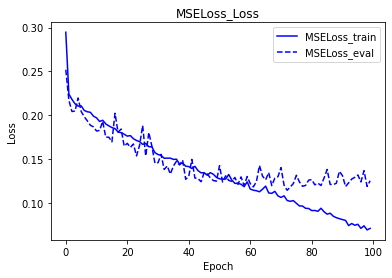

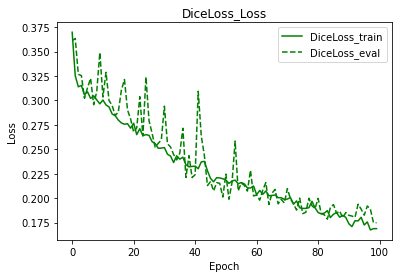

In [13]:
x=np.arange(100)
colors=[['b-','b--'],['g-','g--'],['y-','y--'],['r-','r--']]
for i in range(2):
    plt.plot(x,Losses[i][0],colors[i][0],label=names[i]+'_train')    
    plt.plot(x,Losses[i][1],colors[i][1],label=names[i]+'_eval')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(names[i]+'_Loss')
    plt.legend()
    plt.show()

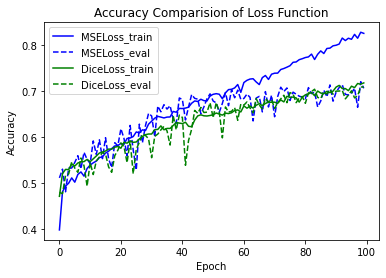

In [14]:
for i in range(2):
    plt.plot(x,Accuracies[i][0],colors[i][0],label=names[i]+'_train')    
    plt.plot(x,Accuracies[i][1],colors[i][1],label=names[i]+'_eval')
    
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparision of Loss Function')
plt.legend()
plt.show()

- The MSELoss with threshold has higher training accuracy than DiceLoss
- The MSELoss has overfitting problem and they have the same eval accuracy
- The eval accuracy seems more likely to be further improved

In [15]:
num_figure=8
imgs=np.arange(num_figure)*10
unet=UNet().cuda()

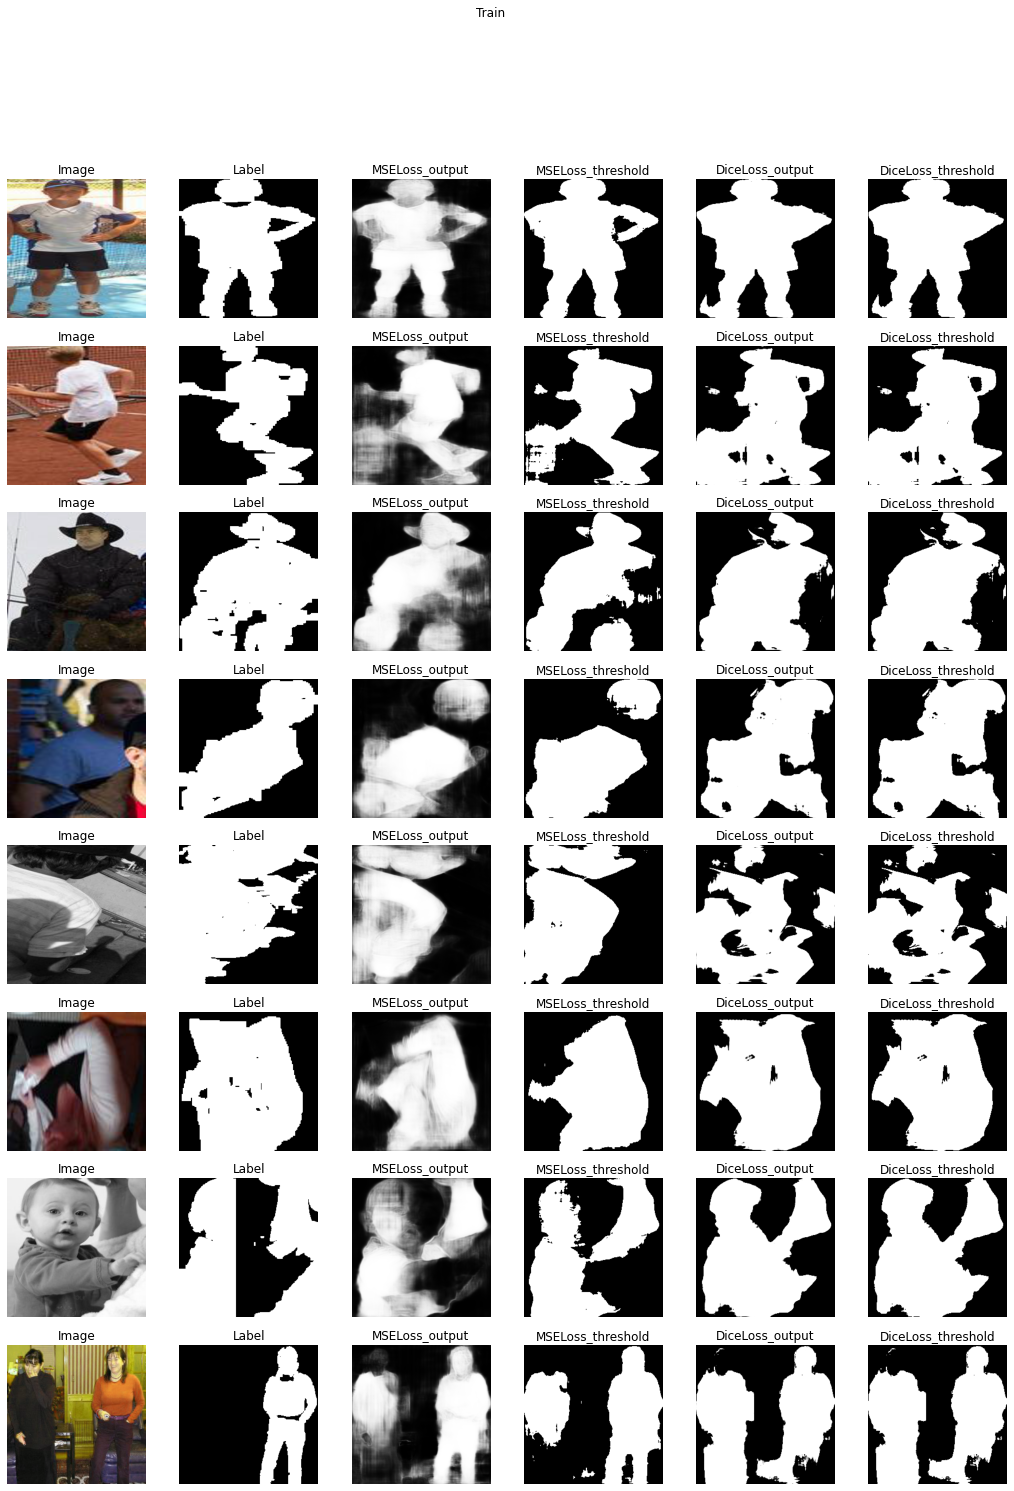

In [28]:
plt.figure(figsize=(18,24))
plt.suptitle('Train')


count=1
show_title=True

for i in imgs:
    
    im,label=train_data.__getitem__(i)
    
    plt.subplot(num_figure,6,count)
    if show_title:
        plt.title('Image')
    plt.imshow(np.transpose(im.numpy(),(1,2,0)))
    plt.axis('off')
    count+=1
    
    
    plt.subplot(num_figure,6,count)
    if show_title:
        plt.title('Label')
    plt.imshow(label.numpy()[0],cmap = plt.get_cmap('gray'))
    plt.axis('off')
    count+=1
    
    for j in range(2):
        
        unet.load_state_dict(torch.load('./w'+str(j)+'.pkl'))
        plt.subplot(num_figure,6,count)
        img=torch.unsqueeze(im,dim=0)
        b_x=Variable(img).cuda()
        output=unet(b_x).to(torch.float64)
        plt.imshow(output.cpu().detach().numpy()[0][0],cmap = plt.get_cmap('gray'))
        plt.axis('off')
        if show_title:
            plt.title(names[j]+'_output')
        count+=1
        
        plt.subplot(num_figure,6,count)
        mask=output.cpu().detach().numpy()[0][0]>0.5
        plt.imshow(mask,cmap = plt.get_cmap('gray'))
        plt.axis('off')
        if show_title:
            plt.title(names[j]+'_threshold') 
        count+=1
    #show_title=False
plt.show()

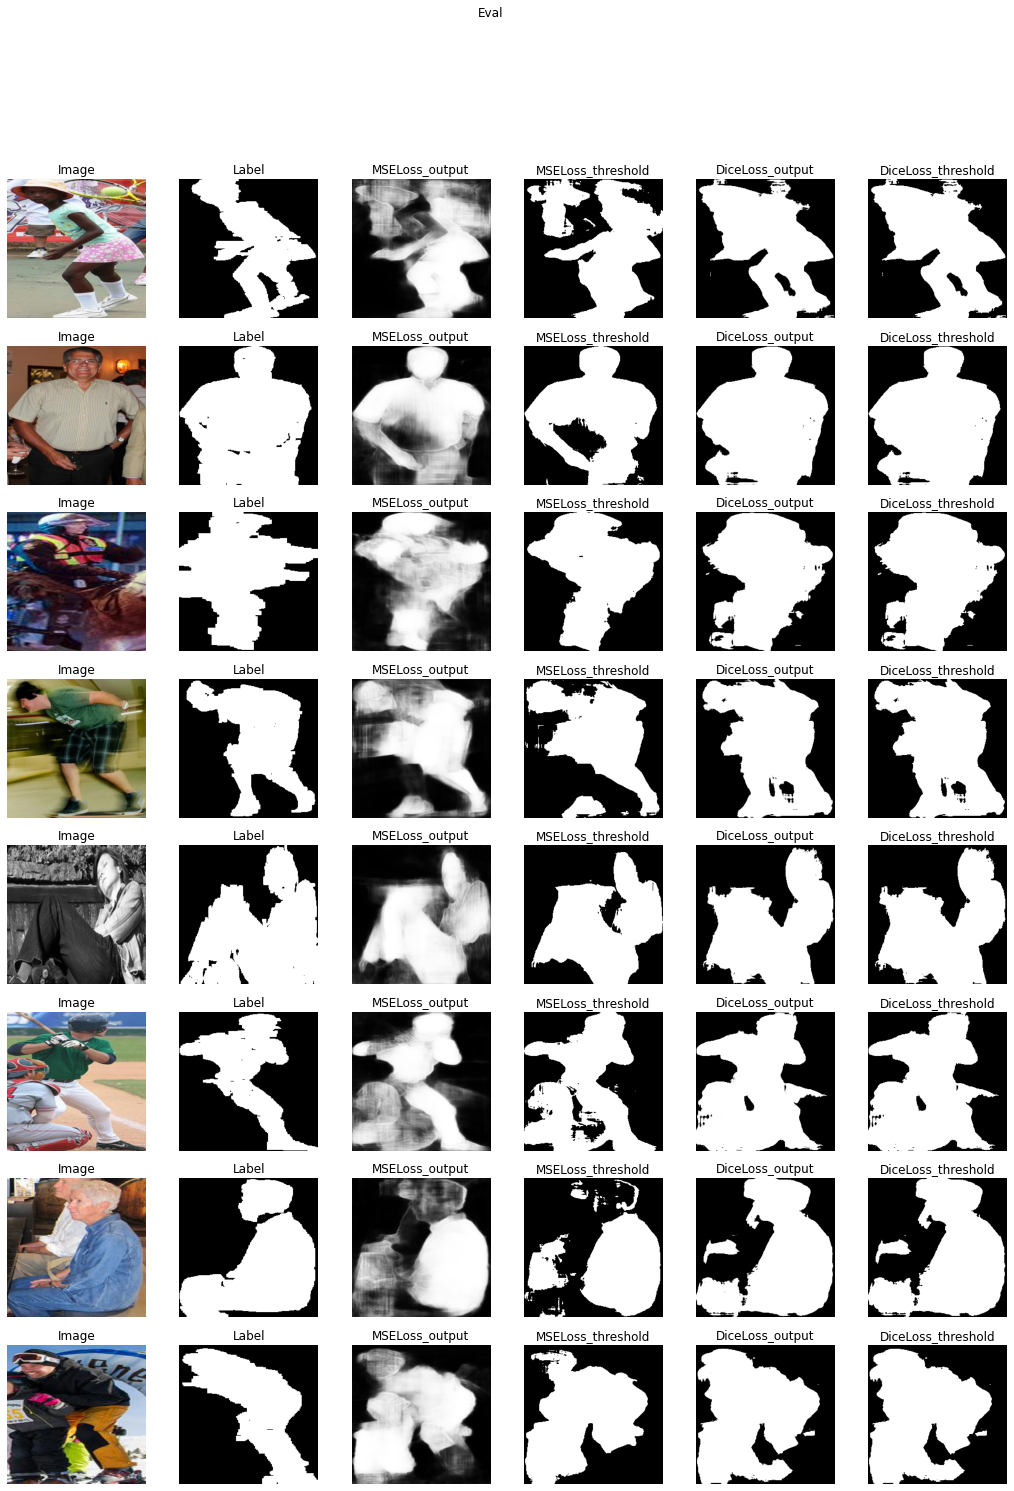

In [29]:
plt.figure(figsize=(18,24))
plt.suptitle('Eval')

count=1
show_title=True

for i in imgs:
    
    im,label=eval_data.__getitem__(i)
    
    plt.subplot(num_figure,6,count)
    if show_title:
        plt.title('Image')
    plt.imshow(np.transpose(im.numpy(),(1,2,0)))
    plt.axis('off')
    count+=1
    
    
    plt.subplot(num_figure,6,count)
    if show_title:
        plt.title('Label')
    plt.imshow(label.numpy()[0],cmap = plt.get_cmap('gray'))
    plt.axis('off')
    count+=1
    
    for j in range(2):
        
        unet.load_state_dict(torch.load('./w'+str(j)+'.pkl'))
        plt.subplot(num_figure,6,count)
        img=torch.unsqueeze(im,dim=0)
        b_x=Variable(img).cuda()
        output=unet(b_x).to(torch.float64)
        plt.imshow(output.cpu().detach().numpy()[0][0],cmap = plt.get_cmap('gray'))
        plt.axis('off')
        if show_title:
            plt.title(names[j]+'_output')
        count+=1
        
        plt.subplot(num_figure,6,count)
        mask=output.cpu().detach().numpy()[0][0]>0.5
        plt.imshow(mask,cmap = plt.get_cmap('gray'))
        plt.axis('off')
        if show_title:
            plt.title(names[j]+'_threshold') 
        count+=1
    #show_title=False
plt.show()

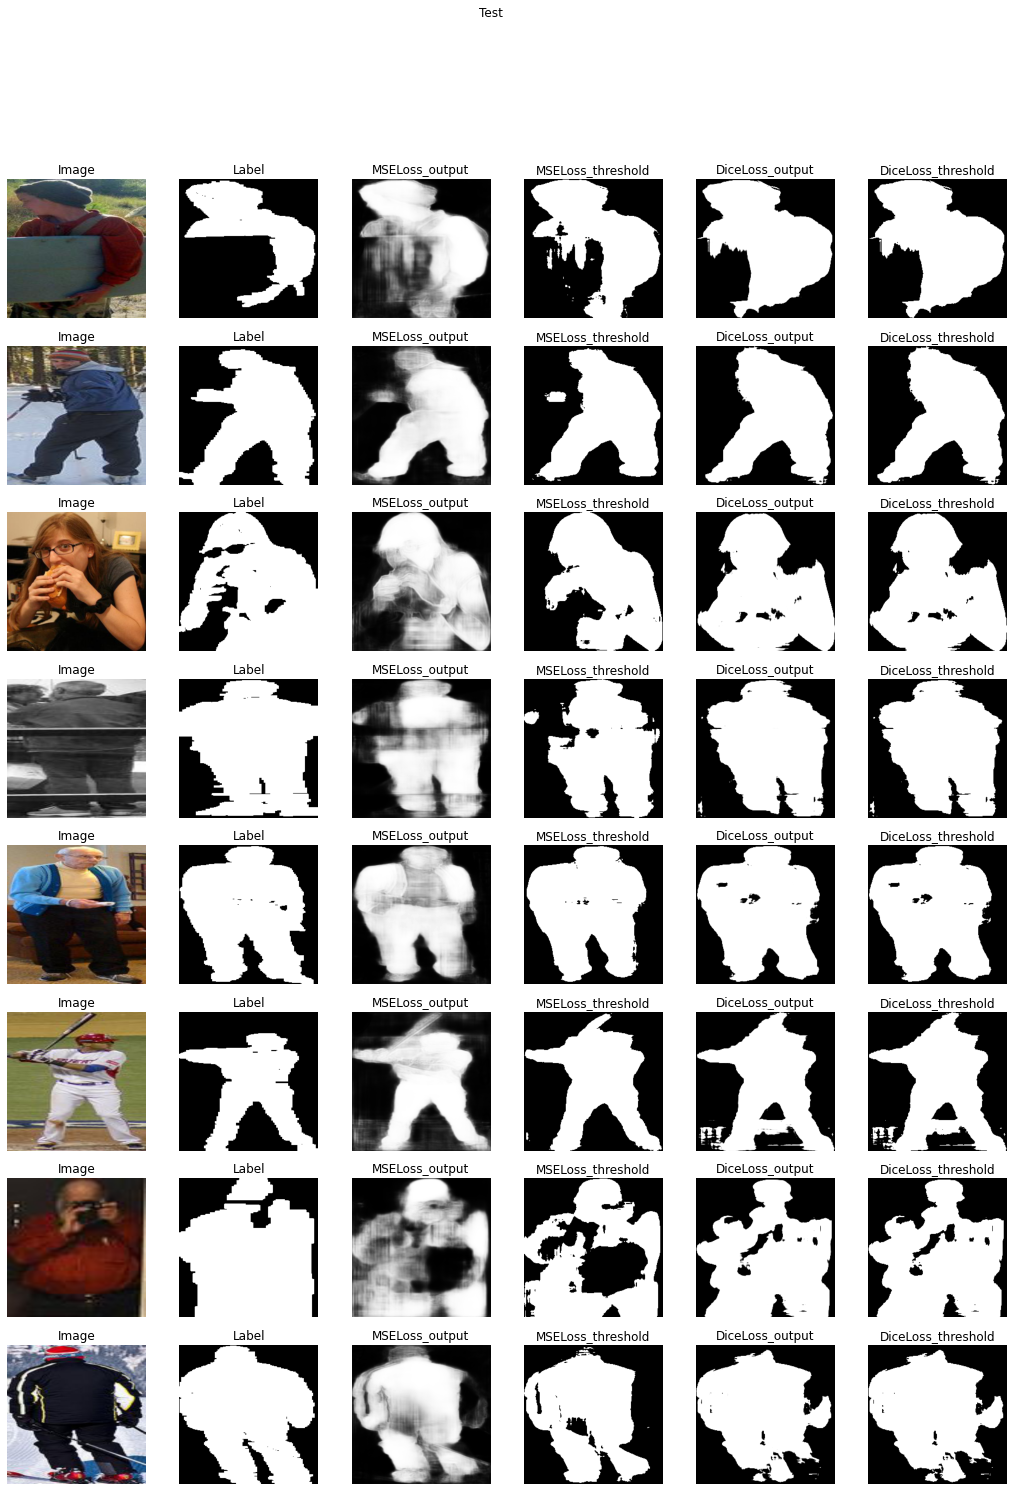

In [30]:
test_data=MyDataSet('test',test_transfrom)
plt.figure(figsize=(18,24))
plt.suptitle('Test')

count=1
show_title=True

for i in imgs:
    
    im,label=test_data.__getitem__(i)
    
    plt.subplot(num_figure,6,count)
    if show_title:
        plt.title('Image')
    plt.imshow(np.transpose(im.numpy(),(1,2,0)))
    plt.axis('off')
    count+=1
    
    
    plt.subplot(num_figure,6,count)
    if show_title:
        plt.title('Label')
    plt.imshow(label.numpy()[0],cmap = plt.get_cmap('gray'))
    plt.axis('off')
    count+=1
    
    for j in range(2):
        
        unet.load_state_dict(torch.load('./w'+str(j)+'.pkl'))
        plt.subplot(num_figure,6,count)
        img=torch.unsqueeze(im,dim=0)
        b_x=Variable(img).cuda()
        output=unet(b_x).to(torch.float64)
        plt.imshow(output.cpu().detach().numpy()[0][0],cmap = plt.get_cmap('gray'))
        plt.axis('off')
        if show_title:
            plt.title(names[j]+'_output')
        count+=1
        
        plt.subplot(num_figure,6,count)
        mask=output.cpu().detach().numpy()[0][0]>0.5
        plt.imshow(mask,cmap = plt.get_cmap('gray'))
        plt.axis('off')
        if show_title:
            plt.title(names[j]+'_threshold') 
        count+=1
    #show_title=False
plt.show()

- It seems that the threshold made the output of MSELoss slightly better  
- The threshold doesn't change the output of Dice Loss
- In the training set, the performance of MSE is slightly better  
- None of them has very nice performance in eval and test data set